In [343]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from bitarray import bitarray
from collections import Counter
from scipy.special import comb

import seaborn as sns
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(20,10)})

p_errs = np.arange(0.01, 0.11, 0.01)
p_errs_2 = np.arange(0.1, 1.0, 0.05)
N_vals = [1, 3, 5, 7]
n_trials = 20000

## Part (a): simulate BSC

In [240]:
def get_bit():
    return np.random.choice(2)

def encode(bit, N):
    #bit will be either 0 or 1
    encoded = bitarray([bit]*N)
    return encoded

def channelize(tx_vector, p_err):
    tx_channelized = bitarray(len(tx_vector))
    for ix, bit in enumerate(tx_vector):
        bit = bit
        value = np.random.random_sample()
        if value < p_err:
            #flip bit
            tx_channelized[ix] = not bit
        else:
            tx_channelized[ix] = bit
    return tx_channelized
    

In [267]:
df_cols = ['N', 'Pe', 'Original', 'Channelized', 'Decision', 'Correct']
#df = pd.DataFrame(columns=df_cols)

#to add a row to a dataframe
#df.loc[len(df)] = [some, list, of, items]

error_count = 0
rows = []

for N in N_vals:
    print("Computing for N = {}".format(N))
    for p_err in p_errs:
        print("    Computing for Pe = {}".format(p_err))
        for i in range(0, n_trials):
            #print("        trial #{}".format(i))
            bit = get_bit()
            rep_coded = encode(bit, N)
            #print("            Encoded bitstream: {}".format(rep_coded))
            to_tx = channelize(rep_coded, p_err)
            #print("            After applying channel: {}".format(to_tx))
            num0s = Counter(to_tx)[False]
            num1s = Counter(to_tx)[True]
            #print("            0s in Rx: {}".format(num0s))
            #print("            1s in Rx: {}".format(num1s))

            if (num0s > num1s):
                rx = 0
            else:
                rx = 1

            if (rx != bit):
                #print("ERRORERRORERRORERRORERRORERRORERRORERRORERRORERRORERRORERROR")
                error_count += 1
                #df.loc[len(df)] = [N, p_err, rep_coded, to_tx, rx, False]
                row = [N, p_err, rep_coded, to_tx, rx, False]
                #errs_for_given_p += 1
            else:
                #df.loc[len(df)] = [N, p_err, rep_coded, to_tx, rx, True]
                row = [N, p_err, rep_coded, to_tx, rx, True]
                
            rows.append(row)
            
            
        #print("\n")
    #print("\n")
    
    
print("Total errors in experiment: {}".format(error_count))

Computing for N = 1
    Computing for Pe = 0.01
    Computing for Pe = 0.02
    Computing for Pe = 0.03
    Computing for Pe = 0.04
    Computing for Pe = 0.05
    Computing for Pe = 0.060000000000000005
    Computing for Pe = 0.06999999999999999
    Computing for Pe = 0.08
    Computing for Pe = 0.09
    Computing for Pe = 0.09999999999999999
Computing for N = 3
    Computing for Pe = 0.01
    Computing for Pe = 0.02
    Computing for Pe = 0.03
    Computing for Pe = 0.04
    Computing for Pe = 0.05
    Computing for Pe = 0.060000000000000005
    Computing for Pe = 0.06999999999999999
    Computing for Pe = 0.08
    Computing for Pe = 0.09
    Computing for Pe = 0.09999999999999999
Computing for N = 5
    Computing for Pe = 0.01
    Computing for Pe = 0.02
    Computing for Pe = 0.03
    Computing for Pe = 0.04
    Computing for Pe = 0.05
    Computing for Pe = 0.060000000000000005
    Computing for Pe = 0.06999999999999999
    Computing for Pe = 0.08
    Computing for Pe = 0.09
    C

In [270]:
df = pd.DataFrame(rows, columns=df_cols)
df

,N,Pe,Original,Channelized,Decision,Correct
0,1,0.01,[False],[False],0,True
1,1,0.01,[True],[True],1,True
2,1,0.01,[True],[True],1,True
3,1,0.01,[False],[False],0,True
4,1,0.01,[False],[False],0,True
...,...,...,...,...,...,...
799995,7,0.10,"[False, False, False, False, False, False, False]","[False, False, False, False, False, False, False]",0,True
799996,7,0.10,"[False, False, False, False, False, False, False]","[False, False, False, False, False, False, False]",0,True
799997,7,0.10,"[False, False, False, False, False, False, False]","[False, False, False, False, False, False, True]",0,True
799998,7,0.10,"[False, False, False, False, False, False, False]","[False, False, False, False, False, False, False]",0,True


In [277]:
experiment_errors = []

for N in N_vals:
    df_N = df[df["N"]==N]
    
    errors_for_N = []
    
    for p_err in p_errs:
        #get the total set of trials for a specific N and Pe
        df_N_perr = df_N[df_N["Pe"]==p_err]
        
        n_errs = df_N_perr[df_N_perr["Correct"] == False].shape[0]
        p_error = n_errs/df_N_perr.shape[0]
        errors_for_N.append(p_error)
        
    experiment_errors.append(errors_for_N)
    
print(len(experiment_errors))
print(len(experiment_errors[2]))

4
10


In [292]:
exp_errs_df = pd.DataFrame(np.array(experiment_errors).T.tolist(), columns=[str(N) for N in N_vals])
exp_errs_df["P"] = p_errs
exp_errs_df

,1,3,5,7,P
0,0.00945,0.00015,0.00000,0.00000,0.01
1,0.02085,0.00110,0.00010,0.00000,0.02
2,0.02845,0.00255,0.00020,0.00000,0.03
3,0.03825,0.00405,0.00055,0.00005,0.04
4,0.05045,0.00760,0.00130,0.00020,0.05
5,0.06185,0.01050,0.00185,0.00045,0.06
6,0.07150,0.01280,0.00370,0.00045,0.07
7,0.08075,0.01660,0.00440,0.00125,0.08
8,0.08840,0.02340,0.00465,0.00240,0.09
9,0.10135,0.02985,0.00855,0.00265,0.10


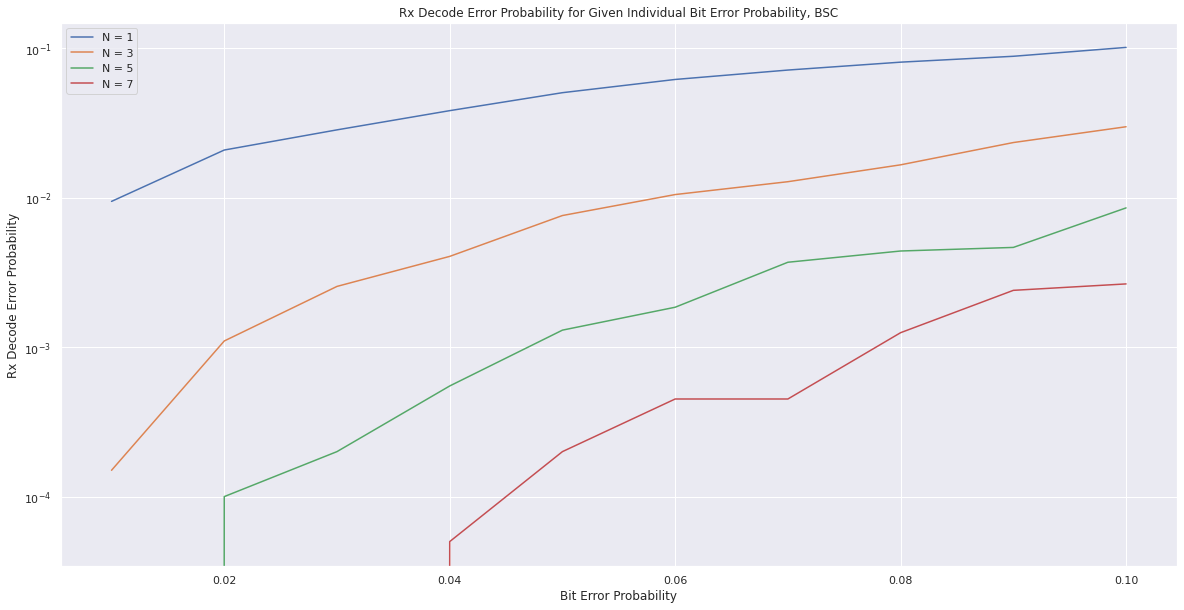

In [319]:
plt.figure()

for N in N_vals:
    sns.lineplot(data=exp_errs_df, x="P", y=str(N), label="N = {}".format(N))

plt.xlabel("Bit Error Probability")
plt.ylabel("Rx Decode Error Probability")
plt.title("Rx Decode Error Probability for Given Individual Bit Error Probability, BSC")
plt.yscale('log')
plt.legend()

## Part (b): compare with theoretical probabilities

In [344]:
experiment = {}

for N in N_vals:
    
    #print(N)
    #print("\n")
    p_errors = []
    
    for Pe in p_errs_2:
        
        #print("    {}".format(Pe))
        summation = 0
        
        for k in range(int(N/2)+1, N+1):
            #print("        {}".format(k))
            term = comb(N, k)*(Pe**k)*((1-Pe)**(N-k))
            summation += term
            
        p_errors.append(summation)
        
    experiment[str(N)] = p_errors
            
            
    #print("\n")

In [346]:
theoretical_df = pd.DataFrame(experiment)
theoretical_df["P"] = p_errs_2
theoretical_df

,1,3,5,7,P
0,0.10,0.02800,0.008560,0.002728,0.10
1,0.15,0.06075,0.026612,0.012103,0.15
2,0.20,0.10400,0.057920,0.033344,0.20
3,0.25,0.15625,0.103516,0.070557,0.25
4,0.30,0.21600,0.163080,0.126036,0.30
5,0.35,0.28175,0.235169,0.199846,0.35
6,0.40,0.35200,0.317440,0.289792,0.40
7,0.45,0.42525,0.406873,0.391712,0.45
8,0.50,0.50000,0.500000,0.500000,0.50
9,0.55,0.57475,0.593127,0.608288,0.55


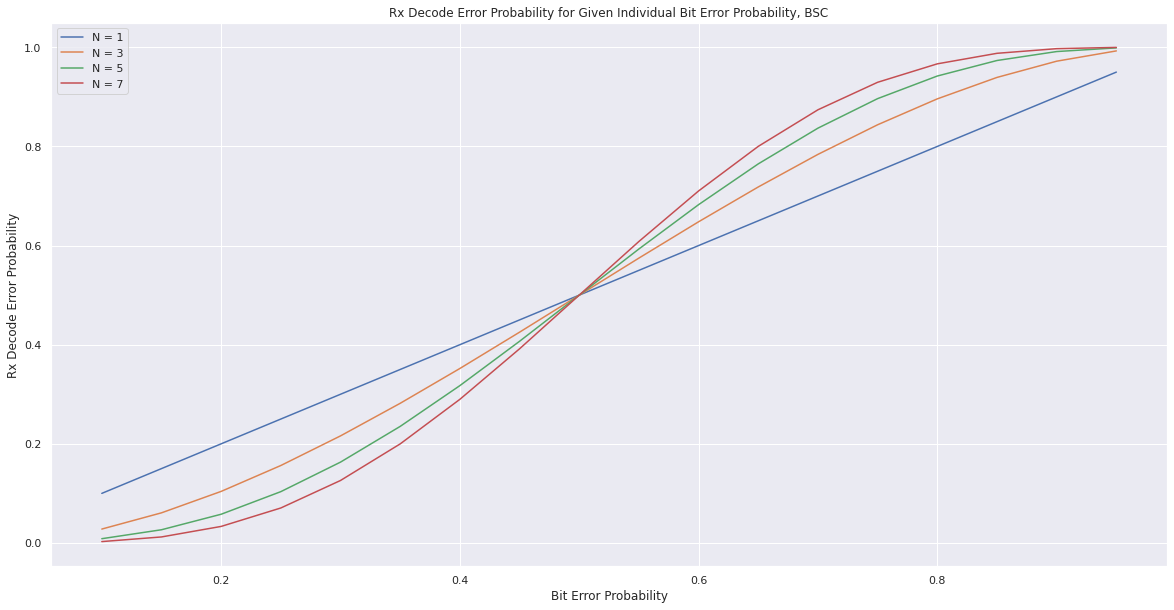

In [348]:
plt.figure()

for N in N_vals:
    sns.lineplot(data=theoretical_df, x="P", y=str(N), label="N = {}".format(N))

plt.xlabel("Bit Error Probability")
plt.ylabel("Rx Decode Error Probability")
plt.title("Rx Decode Error Probability for Given Individual Bit Error Probability, BSC")
#plt.yscale('log')
plt.legend()

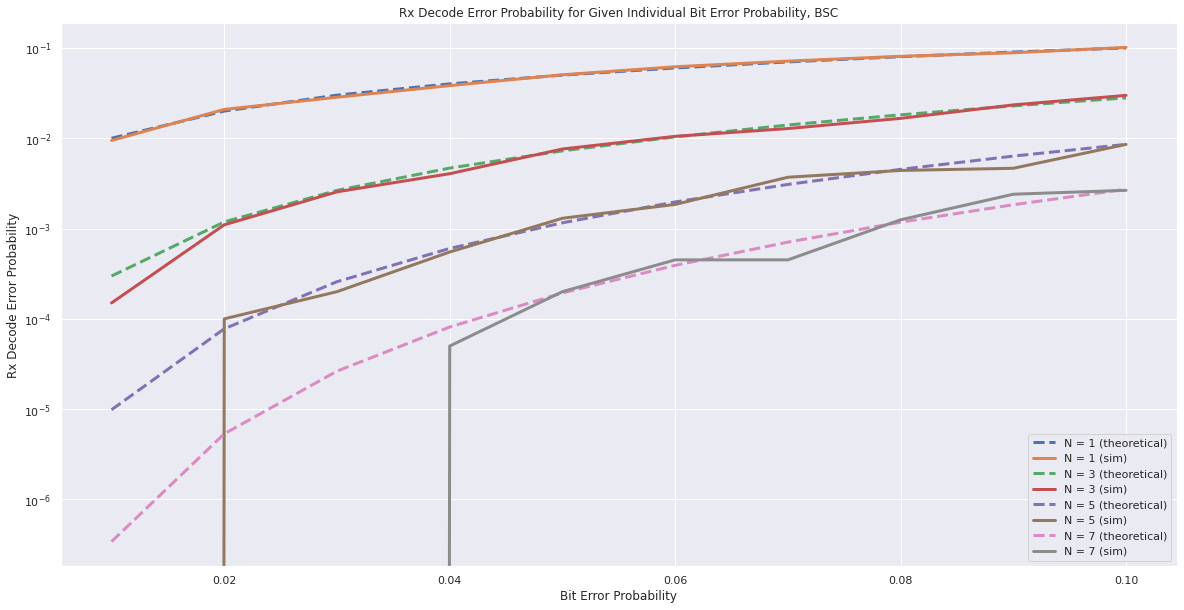

In [342]:
plt.figure()

for N in N_vals:
    ax = sns.lineplot(data=theoretical_df, x="P", y=str(N), linewidth=3, label="N = {} (theoretical)".format(N))
    ax = sns.lineplot(data=exp_errs_df, x="P", y=str(N), linewidth=3, label="N = {} (sim)".format(N))

    
for line in ax.lines[0:8:2]:
    line.set_linestyle("--")

plt.xlabel("Bit Error Probability")
plt.ylabel("Rx Decode Error Probability")
plt.title("Rx Decode Error Probability for Given Individual Bit Error Probability, BSC")
plt.yscale('log')
plt.legend()